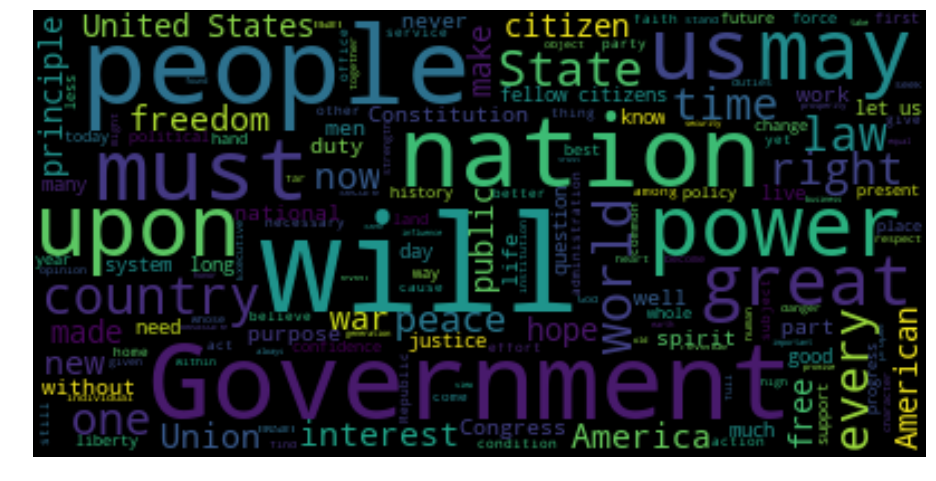

In [3]:
import matplotlib.pyplot as plt
import nltk
from matplotlib import rcParams
import math
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

%matplotlib inline
# import the dataset
from nltk.corpus import inaugural
# extract the datataset in raw format, you can also extract it in other formats as well
text = inaugural.raw()
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


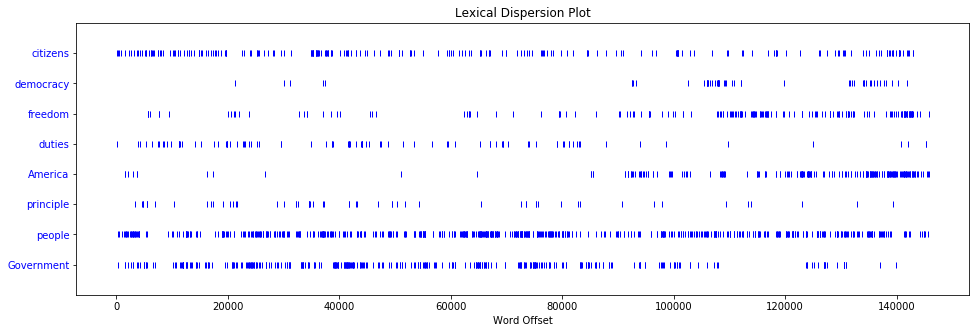

In [4]:
from  nltk.book import text4 as inaugural_speeches
plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)

In [6]:
from nltk.corpus import brown
topics = ['government', 'news', 'religion','adventure','hobbies']
for topic in topics:
    # filter out stopwords and punctuation mark and only create array of words
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    # print 5 most frequent words
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))
    # print 5 least frequent words
    print(topic,'less :', ' , '.join([ word.lower() for word, count in freqdist.most_common()[-5:]]))

government more : year , states , united , may , would
government less : load , cadre , perception , lengthened , shadow
news more : said , would , one , last , two
news less : pupils , render , vitally , richer , fuller
religion more : god , world , one , may , new
religion less : medium , sat , ivory , velvet , sadness
adventure more : said , would , back , man , one
adventure less : snick , fisted , overhand , plunge , insanely
hobbies more : one , may , time , two , first
hobbies less : explore , hinterlands , bride , winner , sweepstakes


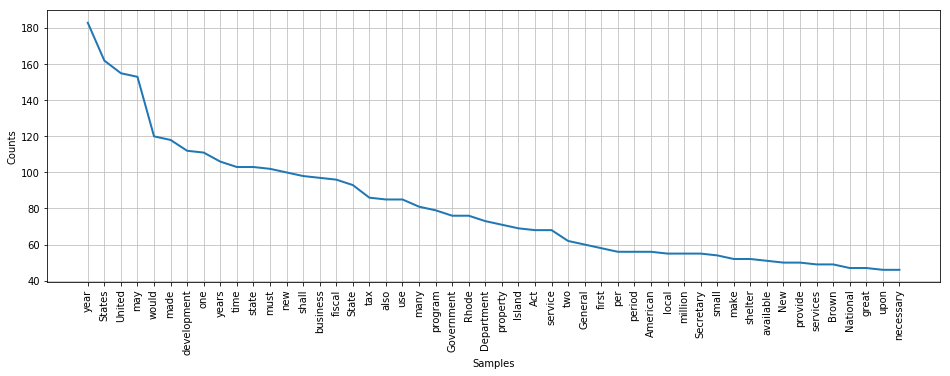

In [8]:
# get all words for government corpus
corpus_genre = 'government'
words = [word for word in brown.words(categories=corpus_genre) if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [9]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2)

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

# calculate and print lexical diversity for each genre of the brown corpus
for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(genre ,lex_div , lex_div_with_stop)

adventure 0.26 0.13
belles_lettres 0.2 0.1
editorial 0.29 0.16
fiction 0.28 0.14
government 0.2 0.11
hobbies 0.25 0.13
humor 0.49 0.25
learned 0.16 0.09
lore 0.24 0.13
mystery 0.26 0.13
news 0.24 0.13
religion 0.32 0.16
reviews 0.39 0.21
romance 0.26 0.13
science_fiction 0.47 0.24


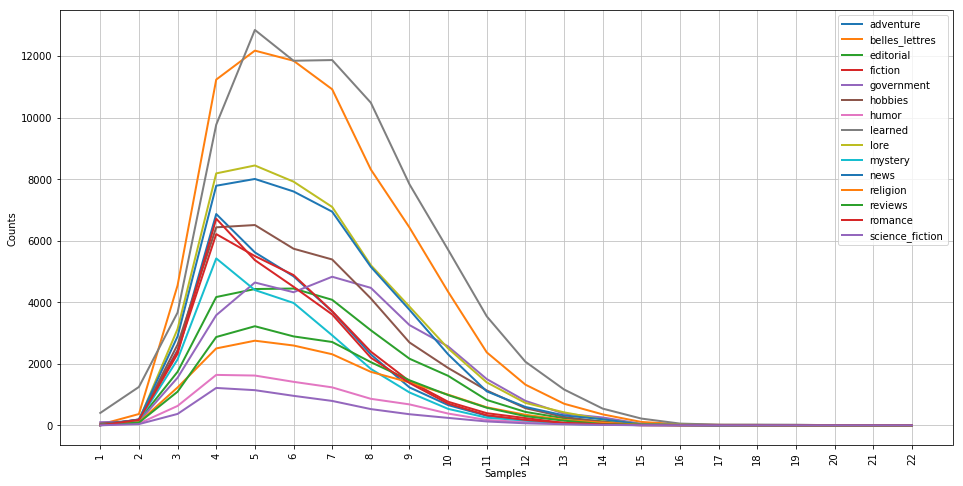

In [10]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(data['job_title'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())